<a href="https://colab.research.google.com/github/KhanhPhantxwes/Beats_By_Dre_DataAnalysis/blob/main/Data_Visualisation_for_Customers_Review_From_Smartwatch_Products_on_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Wordclouds and Frequency Charts**

In [29]:
#Load dataset
df = pd.read_csv('/content/sample_data/smartwatch-reviews.csv')
df.head()

,Product Name,Name,Stars,Title,Date,Description
0,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Karthikeyan,5.0,5.0 out of 5 stars\nGood and reliable watch.,NaN,Very good in terms of features and amazing qua...
1,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Vishvesh,4.0,4.0 out of 5 stars\nThe Perfect Budget Apple W...,NaN,This is the first time I am using an Apple Wat...
2,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Bindu,5.0,5.0 out of 5 stars\nGood One,NaN,Simple look with basic features.\nRead more
3,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Sandhyaram,2.0,2.0 out of 5 stars\nBattery problem,NaN,2h charging 100%\nRead more
4,"Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...",Suresh,1.0,1.0 out of 5 stars\nNot as per image,NaN,Screen is very small\nRead more


In [30]:
#Identify Column with missing values : [Date] column is not valuable so it can be dropped.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  2750 non-null   object 
 1   Name          2750 non-null   object 
 2   Stars         1760 non-null   float64
 3   Title         2750 non-null   object 
 4   Date          0 non-null      float64
 5   Description   2750 non-null   object 
dtypes: float64(2), object(4)
memory usage: 129.0+ KB


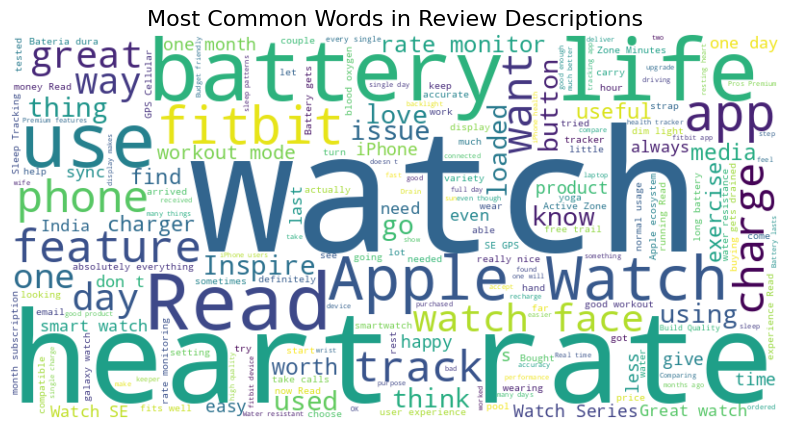

In [31]:
from wordcloud import WordCloud
# Combine all review descriptions into one string
text = " ".join(review for review in df['Description'].dropna())

# Generate a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Review Descriptions", fontsize=16)
plt.show()

## ** Weighted Wordclouds**

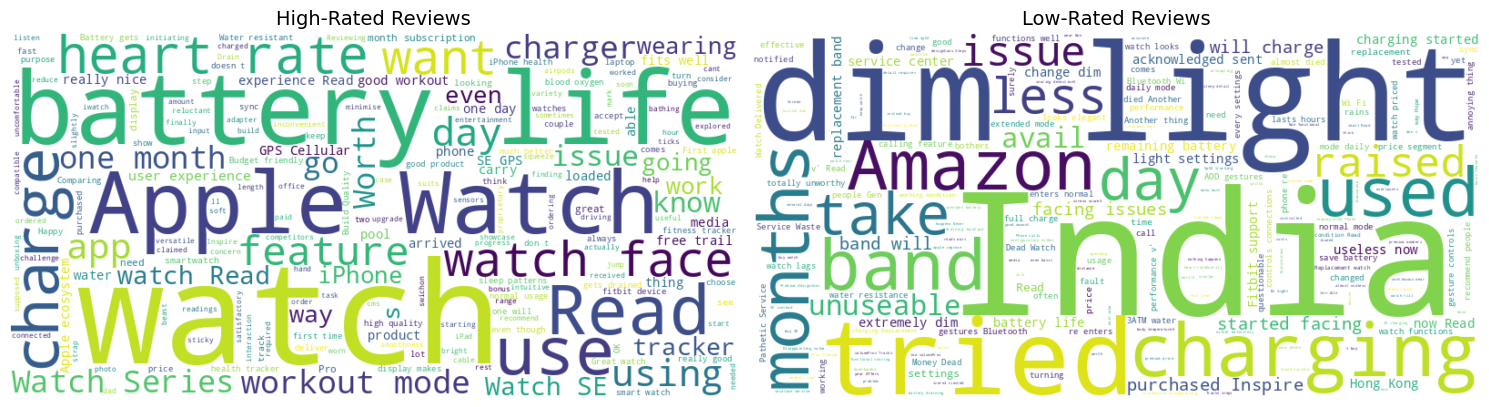

In [32]:
# Separate high-rated and low-rated reviews
high_rated = " ".join(review for review in df[df['Stars'] >= 4]['Description'].dropna())
low_rated = " ".join(review for review in df[df['Stars'] <= 2]['Description'].dropna())

# Generate high-rated wordcloud
high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_rated)

# Generate low-rated wordcloud
low_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rated)

# Display the wordclouds side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(high_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("High-Rated Reviews", fontsize=14)

axs[1].imshow(low_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Low-Rated Reviews", fontsize=14)

plt.tight_layout()
plt.show()

## **Most Frequent Words**

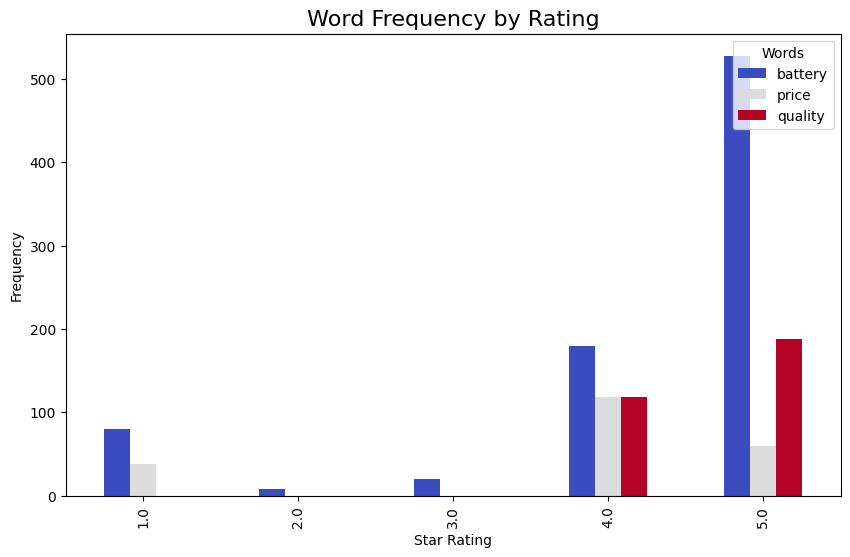

In [33]:
# Define words to compare
words_to_compare = ['battery', 'price', 'quality']

# Count occurrences of each word by rating
word_freq_by_rating = {word: df[df['Description'].str.contains(word, case=False, na=False)]['Stars'].value_counts() for word in words_to_compare}

# Create a DataFrame for plotting
freq_df = pd.DataFrame(word_freq_by_rating).fillna(0)

# Plot as a bar chart
freq_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Word Frequency by Rating", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.legend(title="Words", loc='upper right')
plt.show()


In [34]:
#Create a shorter product name for future visulisation
df['Product Name Short'] = df['Product Name'].str.split().str[:3].str.join(' ')
df['Product Name Short'].value_counts()


,count
Product Name Short,
Fitbit Inspire 2,650
Apple Watch SE,456
Apple Watch Series,400
"Garmin Forerunner 45,",384
"Garmin Forerunner 55,",290
Fossil Gen 6,220
Fitbit Versa 4,130
Fitbit Inspire 3,130
Garmin Vivoactive 3,90


## **Compare the Average Star Rating Across Brands**

/tmp/ipython-input-35-2405212369.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Name Short', y='Stars', data=avg_rating, palette='muted')


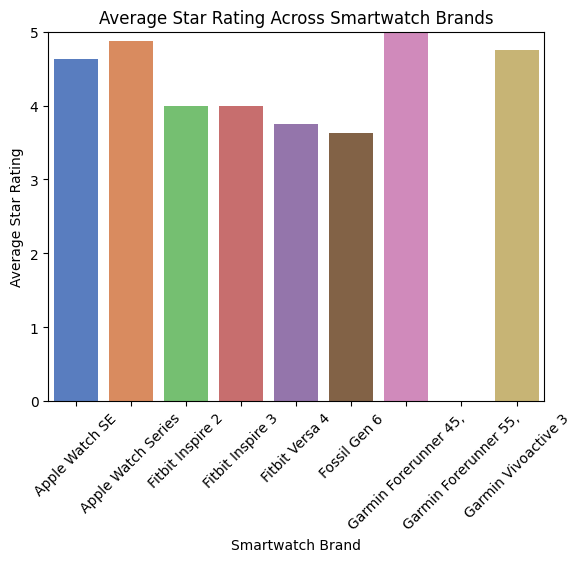

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average star rating for each product
avg_rating = df.groupby('Product Name Short')['Stars'].mean().reset_index()

# Plot the average ratings
sns.barplot(x='Product Name Short', y='Stars', data=avg_rating, palette='muted')
plt.title("Average Star Rating Across Smartwatch Brands")
plt.xlabel("Smartwatch Brand")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()

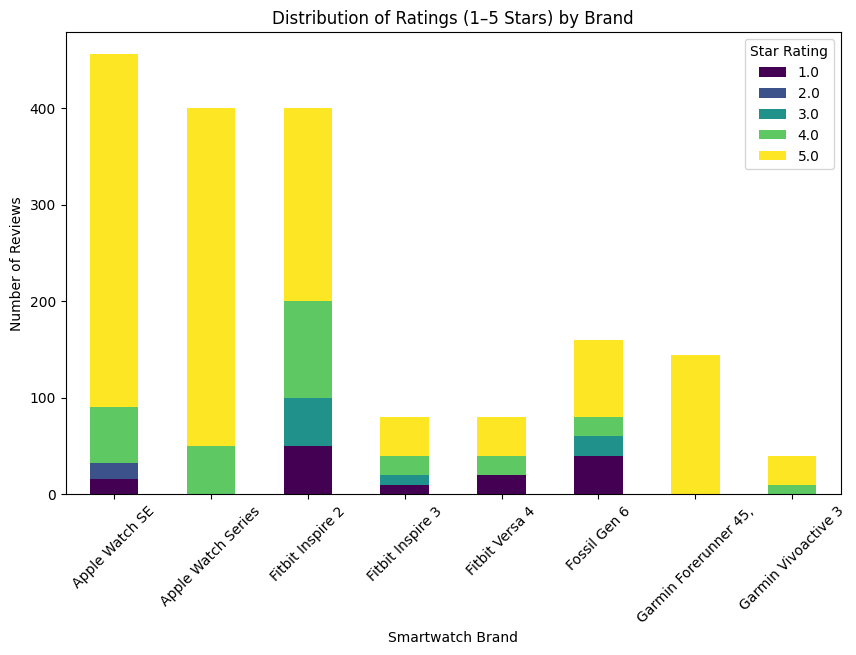

In [36]:
# Count the number of each star rating per product
rating_counts = df.groupby(['Product Name Short', 'Stars']).size().unstack(fill_value=0)

# Plot the stacked bar chart
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Distribution of Ratings (1–5 Stars) by Brand")
plt.xlabel("Smartwatch Brand")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Star Rating", loc="upper right")
plt.show()